# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [1]:
import pandas as pd

df = pd.read_csv("../results/cluster_magic_6.csv")
df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time
0,32,0,ff,1,1,0.99816,0.99798,0.875920,0.858581,6709.4940,55.62024,15.759360
1,32,0,ff,2,1,0.99816,0.99798,0.875920,0.858581,3588.5260,34.01594,8.947350
2,32,0,ff,4,1,0.99816,0.99798,0.875920,0.858581,2045.3020,19.63650,6.364512
3,32,0,ff,8,1,0.99816,0.99798,0.875920,0.858581,1212.0480,15.59678,4.815544
4,32,0,ff,16,1,0.99816,0.99798,0.875920,0.858581,551.2674,12.99174,5.451242
...,...,...,...,...,...,...,...,...,...,...,...,...
58,128,0,omp,4,1,1.00000,1.00000,0.873817,0.856364,7123.1460,54.53758,14.374420
59,128,0,omp,8,1,1.00000,1.00000,0.873817,0.856364,3660.3960,29.14686,7.953948
60,128,0,omp,16,1,1.00000,1.00000,0.873817,0.856364,1843.0240,15.42194,4.454134
61,128,0,omp,32,1,1.00000,1.00000,0.873817,0.856364,1317.9420,13.51142,3.380852


In [ ]:
seq = df[df["backend"] == "seq"]

keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["train_speedup"] = merged["train_time_seq"] / merged["train_time_mt"]
df["train_efficiency"] = df["train_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency
0,32,0,ff,1,1,0.99816,0.99798,0.875920,0.858581,6709.4940,55.62024,15.759360,1.000460,1.000460
1,32,0,ff,2,1,0.99816,0.99798,0.875920,0.858581,3588.5260,34.01594,8.947350,1.870567,0.935284
2,32,0,ff,4,1,0.99816,0.99798,0.875920,0.858581,2045.3020,19.63650,6.364512,3.281951,0.820488
3,32,0,ff,8,1,0.99816,0.99798,0.875920,0.858581,1212.0480,15.59678,4.815544,5.538213,0.692277
4,32,0,ff,16,1,0.99816,0.99798,0.875920,0.858581,551.2674,12.99174,5.451242,12.176632,0.761039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,128,0,omp,4,1,1.00000,1.00000,0.873817,0.856364,7123.1460,54.53758,14.374420,3.748144,0.937036
59,128,0,omp,8,1,1.00000,1.00000,0.873817,0.856364,3660.3960,29.14686,7.953948,7.293905,0.911738
60,128,0,omp,16,1,1.00000,1.00000,0.873817,0.856364,1843.0240,15.42194,4.454134,14.486290,0.905393
61,128,0,omp,32,1,1.00000,1.00000,0.873817,0.856364,1317.9420,13.51142,3.380852,20.257781,0.633056


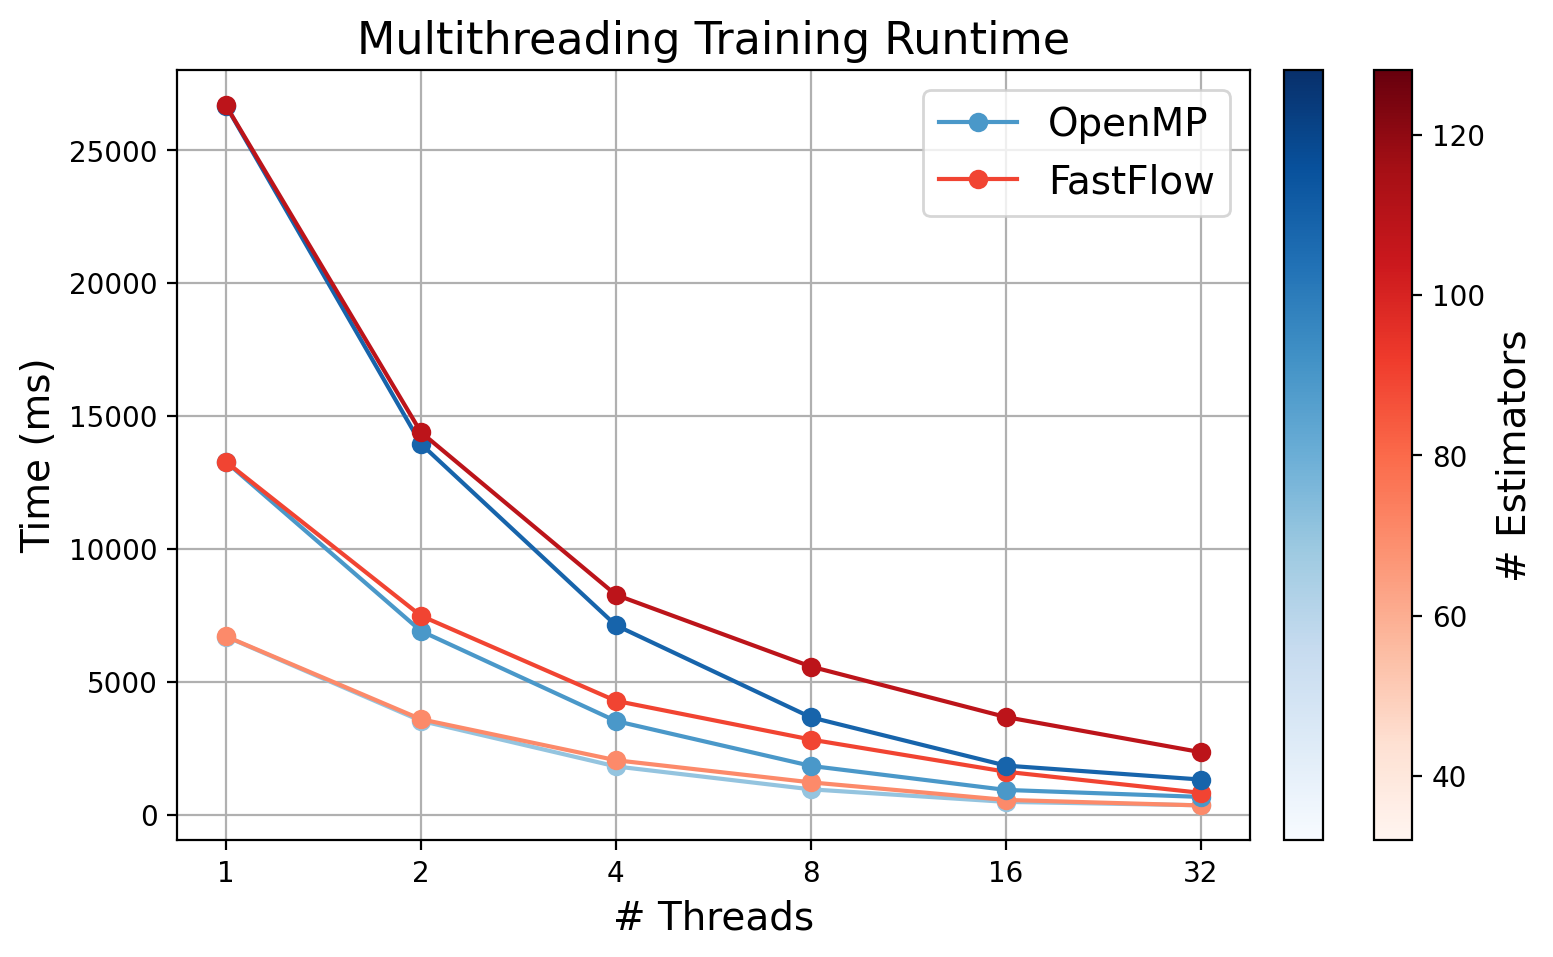

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_time"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_time"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

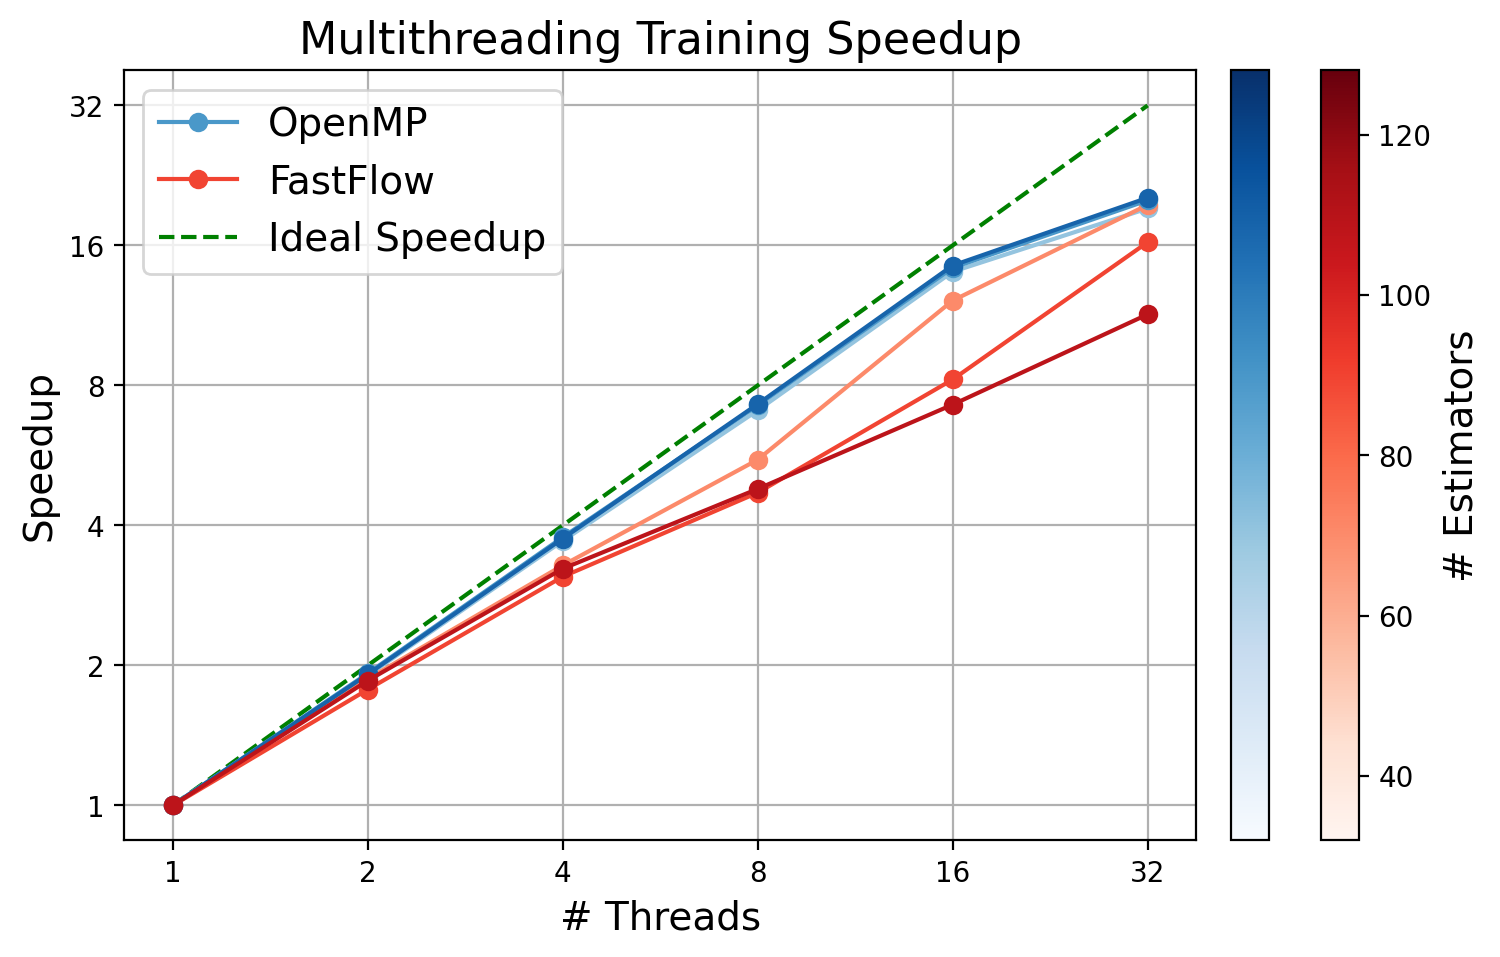

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_speedup"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_speedup"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ideal_handle = plt.Line2D([], [], color="green", linestyle="--", label="Ideal Speedup")
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

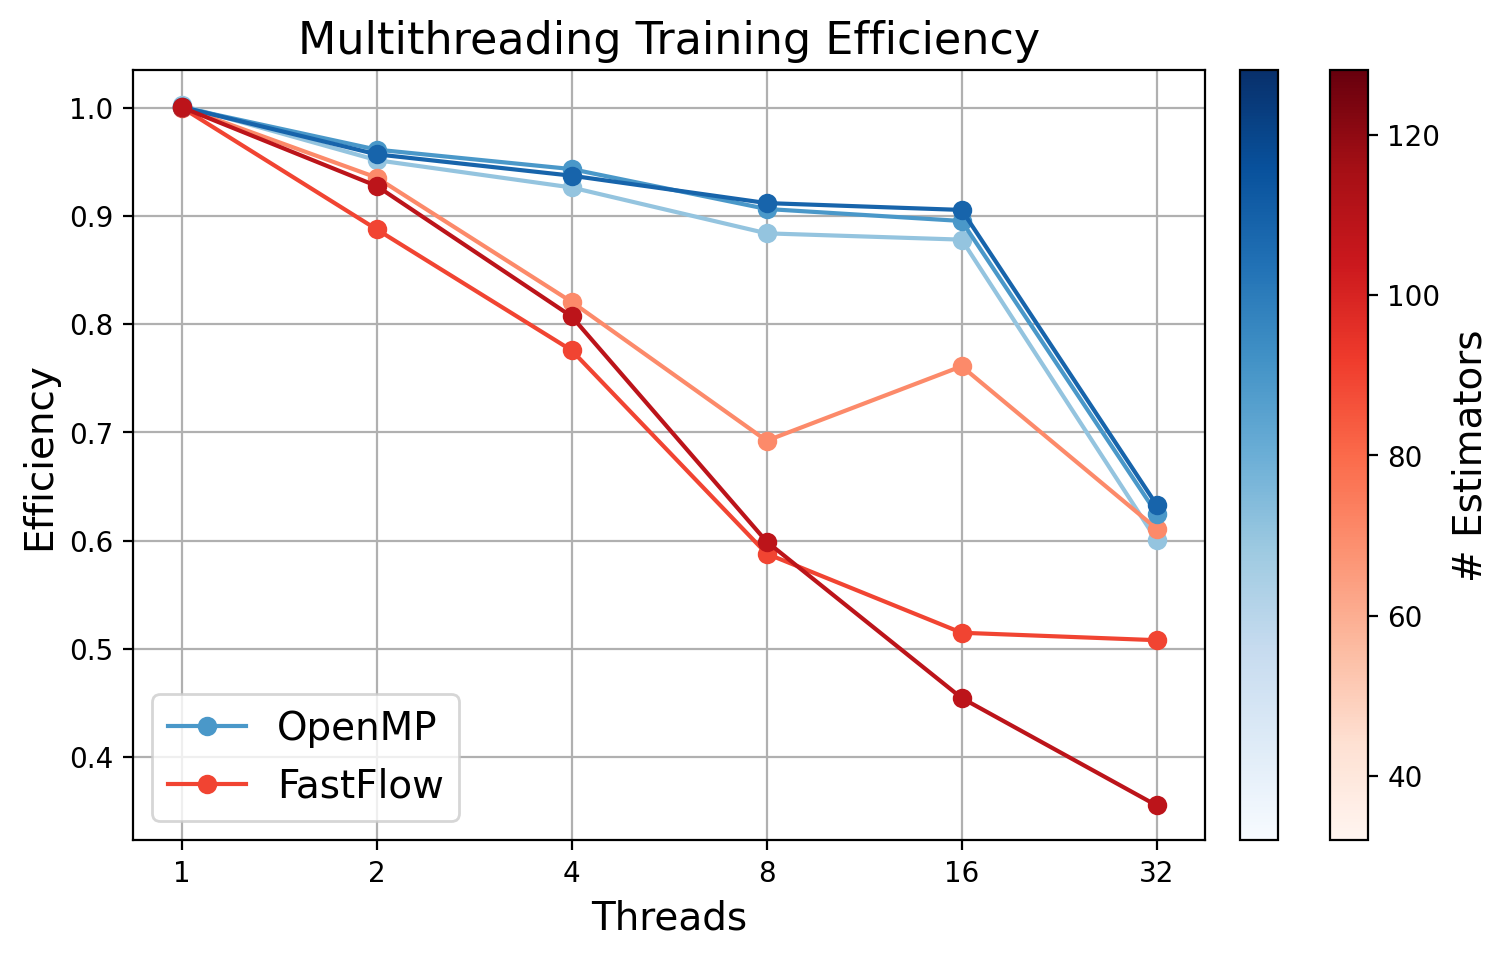

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_efficiency"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_efficiency"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [6]:
keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["predict_speedup"] = merged["test_predict_time_seq"] / merged["test_predict_time_mt"]
df["predict_efficiency"] = df["predict_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency,predict_speedup,predict_efficiency
0,32,0,ff,1,1,0.99816,0.99798,0.875920,0.858581,6709.4940,55.62024,15.759360,1.000460,1.000460,0.840137,0.840137
1,32,0,ff,2,1,0.99816,0.99798,0.875920,0.858581,3588.5260,34.01594,8.947350,1.870567,0.935284,1.479770,0.739885
2,32,0,ff,4,1,0.99816,0.99798,0.875920,0.858581,2045.3020,19.63650,6.364512,3.281951,0.820488,2.080288,0.520072
3,32,0,ff,8,1,0.99816,0.99798,0.875920,0.858581,1212.0480,15.59678,4.815544,5.538213,0.692277,2.749434,0.343679
4,32,0,ff,16,1,0.99816,0.99798,0.875920,0.858581,551.2674,12.99174,5.451242,12.176632,0.761039,2.428808,0.151800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,128,0,omp,4,1,1.00000,1.00000,0.873817,0.856364,7123.1460,54.53758,14.374420,3.748144,0.937036,3.630135,0.907534
59,128,0,omp,8,1,1.00000,1.00000,0.873817,0.856364,3660.3960,29.14686,7.953948,7.293905,0.911738,6.560400,0.820050
60,128,0,omp,16,1,1.00000,1.00000,0.873817,0.856364,1843.0240,15.42194,4.454134,14.486290,0.905393,11.715202,0.732200
61,128,0,omp,32,1,1.00000,1.00000,0.873817,0.856364,1317.9420,13.51142,3.380852,20.257781,0.633056,15.434299,0.482322


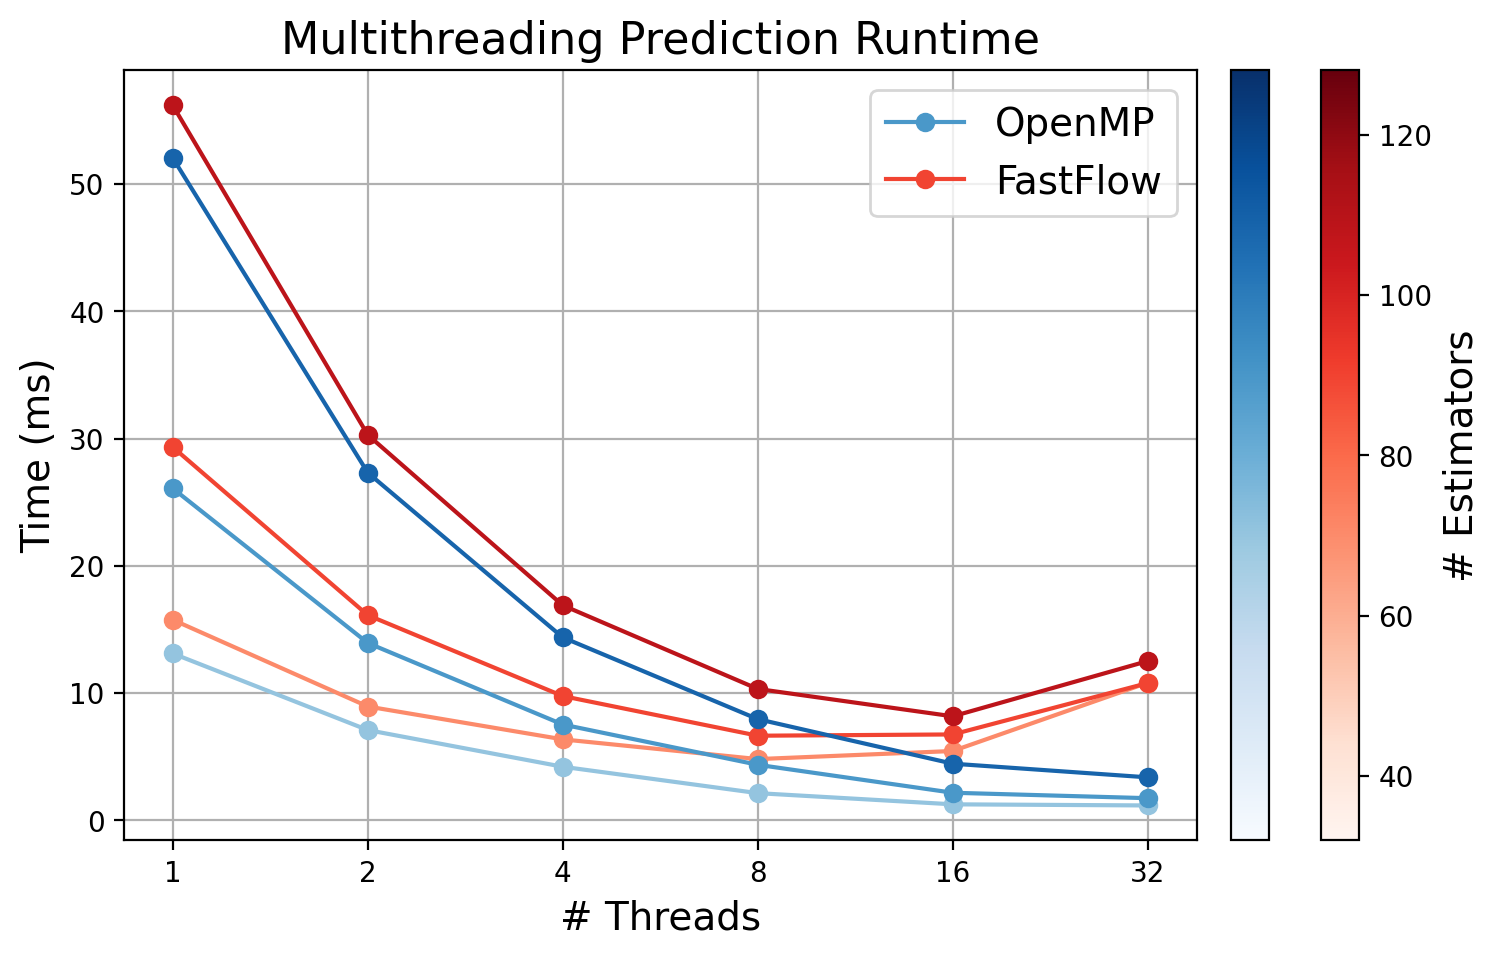

In [7]:
omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["test_predict_time"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["test_predict_time"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

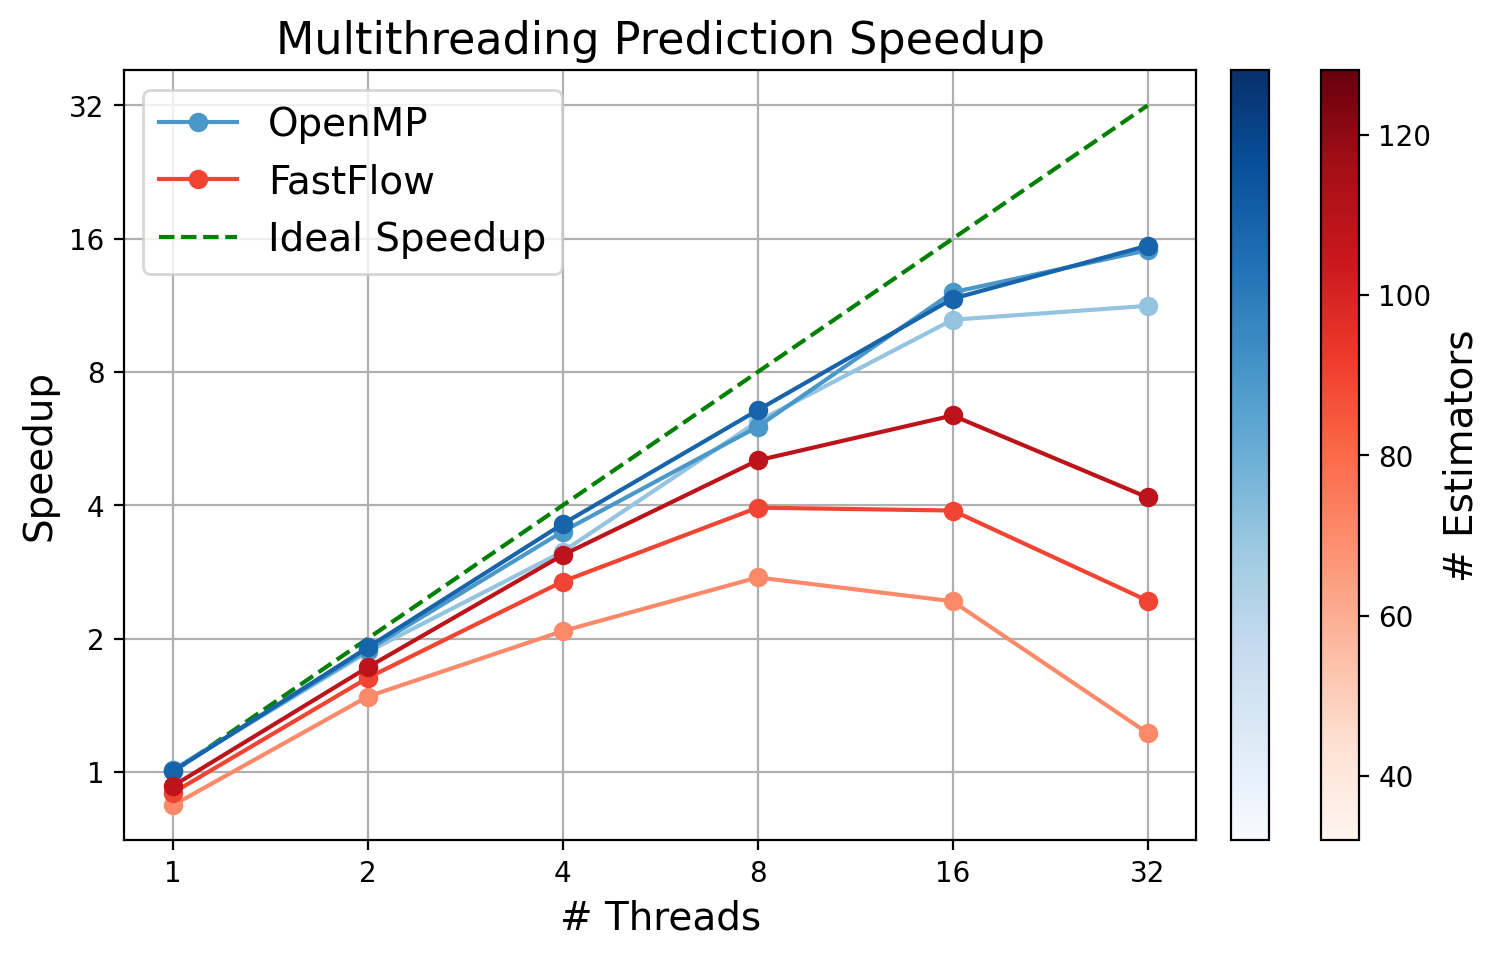

In [8]:
omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["predict_speedup"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["predict_speedup"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ideal_handle = plt.Line2D([], [], color="green", linestyle="--", label="Ideal Speedup")
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

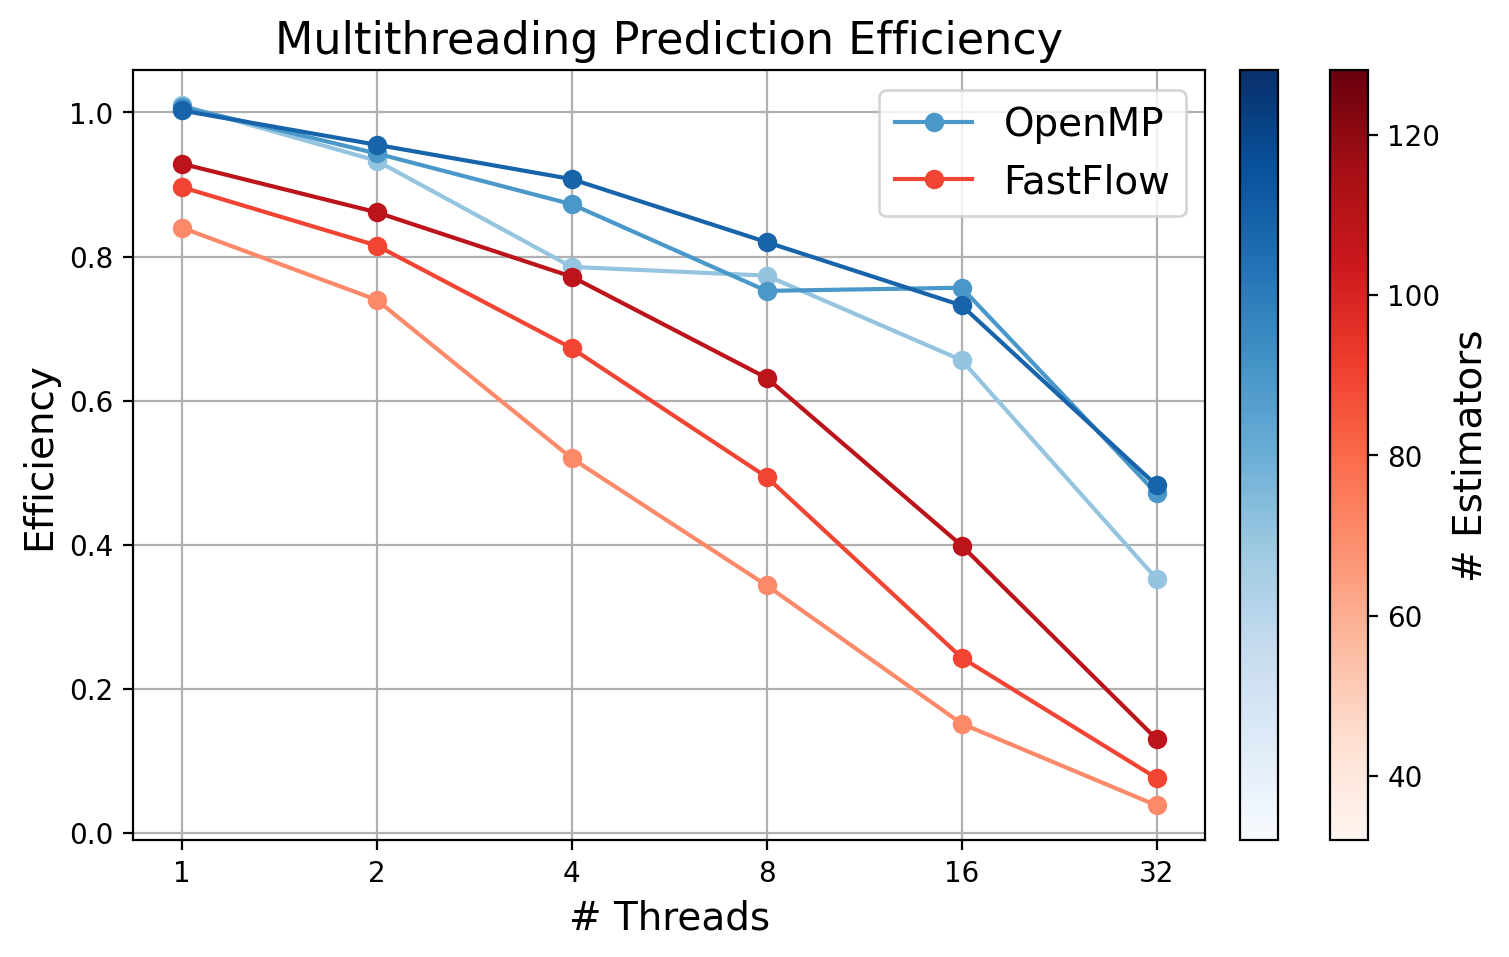

In [9]:
omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["predict_efficiency"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["predict_efficiency"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [ ]:
train_ws